<a href="https://colab.research.google.com/github/cheronoF/Data-Science/blob/main/Pump_It_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUMP-IT-UP




# Defining the question

## Specific question
The objective is to determine and analyse the factors affecting water point functionality. We will further predict the status of the waterpoint with  factors provided in the data.



#  Understanding Context
 Lack of clean water in Tanzania led the government to  set up various water points around the country by  implementing pumping technology to ensure the availability of clean piped water that is safe for drinking. Over the years, some of these water points have been rendered non-functional mainly as a result of low maintenance.

 Maintenance of these water points will require engineers or maintenance teams to move from one water point to another to check the functionality status which might waste time and resources in case the water points are functional.

# OBJECTIVES

## Main objective
To predict the operating condition of a waterpoint for each record in the dataset.

## Specific objectives
* *To identify the organisations that installed the various water points*
* *To identify the management schemes that manage the various water points*
* *To identify the regions containing the most functional and non-functional water points respectively*
* *To identify the functionality status of water points in the regions with high population*
* *To note the relationship between the functionality status of a water point with the quality of water*
* *To note the relationship between the functionality status of a water point with the type of water extraction*
* *To note the relationship between the functionality status of a water point with the payment status*
* *To note the relationship between the functionality status of a water point with the quantity of water*
* *To note whether the functionality status of a water point is influenced by whether or not the water point has a permit*


## Defining the Metric for Success

To  build model that can correctly classify the waterpoint functionality status

# Experimental Design
Below is the expected workflow:

* Data Cleaning and preparation
 * Loading our libraries and dataset
 * Dealing with missing values
 * Dealing with duplicates

* Performing EDA
 * Univariate Analysis
 * Bivariate Analysis

* Feature Engineering

* Modelling

* Performance Evaluation

* Performance Analysis

* Conclusion

* Recommendations




# Data Relevance
 The Pump it UP dataset is from Taarifa and the Tanzanian Ministry of water
 
[Dataset link](https://drive.google.com/drive/folders/1N6aPcn3T7z6n0QaPrn5PDHhaYXy0_VNh?usp=sharing)


## Data Reading

In [ ]:
# Importing the necessary libararies.
import pandas  as pd
import numpy as np # for dealing wiht numbers
import seaborn as sns # for visualization 
import matplotlib.pyplot as plt # plotting 
#table format 
from google.colab import data_table
data_table.enable_dataframe_formatter()

#library for warning function 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading our datasets.
labels = pd.read_csv('/content/Training set labels.csv')
train = pd.read_csv('/content/Training set values.csv')

# Data Exploration

In [ ]:
# Previewing the top of our labels dataset.
labels.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

Our target variable is status group which has three categories: functional, functional needs repair and non_functional.

In [ ]:
# Previewing the top of our train dataset
train.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   
2                   dam                   dam       surface   
3           machine dbh              borehole   groundwater   
4  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [ ]:
# Merging the two datasets.
labels = pd.read_csv('/content/Training set labels.csv')
train = pd.read_csv('/content/Training set values.csv')

df=pd.merge(labels, train, on='id')



In [ ]:
# Previewing the top of our merged dataset.

df.head()

id    status_group  amount_tsh date_recorded        funder  gps_height  \
0  69572      functional      6000.0    2011-03-14         Roman        1390   
1   8776      functional         0.0    2013-03-06       Grumeti        1399   
2  34310      functional        25.0    2013-02-25  Lottery Club         686   
3  67743  non functional         0.0    2013-01-28        Unicef         263   
4  19728      functional         0.0    2011-07-13   Action In A           0   

      installer  longitude   latitude              wpt_name  ...  \
0         Roman  34.938093  -9.856322                  none  ...   
1       GRUMETI  34.698766  -2.147466              Zahanati  ...   
2  World vision  37.460664  -3.821329           Kwa Mahundi  ...   
3        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu  ...   
4       Artisan  31.130847  -1.825359               Shuleni  ...   

   payment_type water_quality quality_group      quantity  quantity_group  \
0      annually          soft          good        enough          enough   
1     never pay          soft          good  insufficient    insufficient   
2    per bucket          soft          good        enough          enough   
3     never pay          soft          good           dry             dry   
4     never pay          soft          good      seasonal        seasonal   

                 source           source_type source_class  \
0                spring                spring  groundwater   
1  rainwater harvesting  rainwater harvesting      surface   
2                   dam                   dam      surface   
3           machine dbh              borehole  groundwater   
4  rainwater harvesting  rainwater harvesting      surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 41 columns]

In [ ]:
#Checking the dimension of the dataset after merging the train dataset ansd labels.
df.shape

(59400, 41)

The dataset has 59400 rows and 41 columns.

##DATA CLEANING

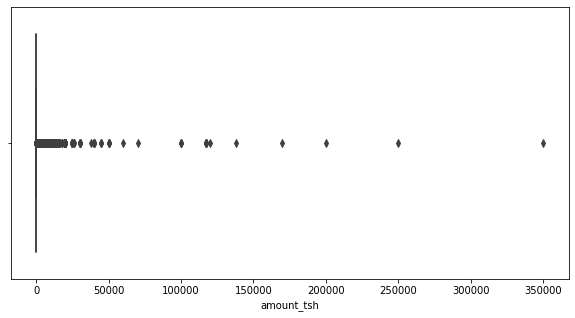

In [ ]:
# Checking for outliers.

plt.figure(figsize=(10,5))
sns.boxplot(df['amount_tsh'])

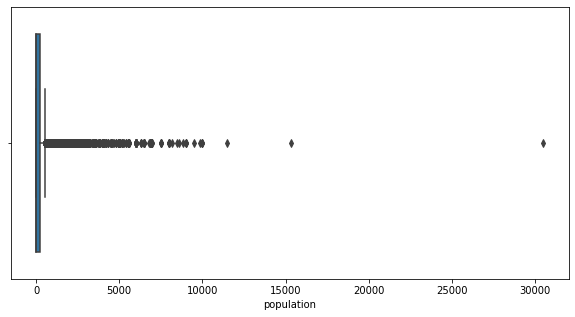

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df['population'])

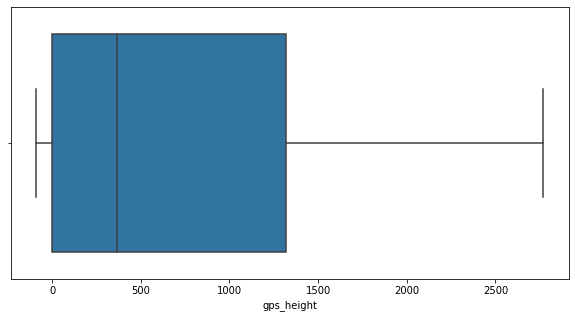

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df['gps_height'])

There were outliers detected but we did not remove them being that they were true entries.

In [ ]:
# Checking for duplicates.
df.duplicated().sum()


0

There are no duplicates

In [ ]:
# Checking for missing values
df.isnull().sum()


id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

There are several missing values in the following columns:
1. scheme name 
2. public meeting
3. scheme management
4. permit 
5. funder
6. installer.

### Dealing with missing values

In [ ]:
# Imputing missing values in the scheme name col with " missing"
df['scheme_name']= df["scheme_name"].fillna("missing")

We impute missing values in the 'scheme_ name' column with the term "missing" because it is the best way of dealing with the null values. Dropping these values will result in loosing a lot of important data thus hindering our prediction analysis.

In [ ]:
# Imputation  for funder and installer
df["funder"] = df["funder"].fillna("unknown")
df["installer"] = df["installer"].fillna("unknown")

We fill the installer and funder columns with the term unknown because dropping them will hinder our performance analysis.

In [ ]:
# Dropping the rows with missing values in column 'permit' 
df.dropna(inplace= True)

We drop the null values the 'permit' column because they are few and have no significant influence on our analysis if removed.

In [ ]:
# Removing unnecessary columns
df.drop(['num_private','waterpoint_type_group','source','quantity_group','payment','extraction_type_group','recorded_by','public_meeting','subvillage'],axis=1, inplace=True)

We drop the columns because they carry the same information as other columns that we have retained.

In [ ]:
# Checking the shape of the data
df.shape

(49478, 32)

Our data has 49478  rows and 32 columns

#EDA

##Univariate Analysis

In [ ]:
# Statistical summary for the Amount Total Static Head

print("Maximum Total Static Head:", (df["amount_tsh"].max()))
print("Minimum Total Static Head:", (df["amount_tsh"].min()))
print("Mean of the Total Static Head:", (df["amount_tsh"].mean()))
print("Modal Total Static Head:", (df["amount_tsh"].mode()))
print("Median Total Static Head:", (df["amount_tsh"].median()))

Maximum Total Static Head: 250000.0
Minimum Total Static Head: 0.0
Mean of the Total Static Head: 354.7999191559885
Modal Total Static Head: 0    0.0
dtype: float64
Median Total Static Head: 0.0


The maximum TSH is 250,000 , the mean is 354 and most of the waterpoints are empty given that the modal TSH is 0.

In [ ]:
# Statistical summary of GPS Height 

print("Maximum gps height:", (df["gps_height"].max()))
print("Minimum gps height:", (df["gps_height"].min()))
print("Mean gps height:", (df["gps_height"].mean()))
print("Median gps height:", (df["gps_height"].median()))
print("Modal gps height:", (df["gps_height"].mode()))

Maximum gps height: 2770
Minimum gps height: -90
Mean gps height: 685.7381462468168
Median gps height: 421.0
Modal gps height: 0    0
dtype: int64


In [ ]:
# Creating a copy for Univariate Analysis 
df_eda = df.copy()
df_eda.head()

id    status_group  amount_tsh date_recorded               funder  \
0  69572      functional      6000.0    2011-03-14                Roman   
2  34310      functional        25.0    2013-02-25         Lottery Club   
3  67743  non functional         0.0    2013-01-28               Unicef   
5   9944      functional        20.0    2011-03-13  Mkinga Distric Coun   
6  19816  non functional         0.0    2012-10-01                 Dwsp   

   gps_height     installer  longitude   latitude              wpt_name  ...  \
0        1390         Roman  34.938093  -9.856322                  none  ...   
2         686  World vision  37.460664  -3.821329           Kwa Mahundi  ...   
3         263        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu  ...   
5           0           DWE  39.172796  -4.765587                Tajiri  ...   
6           0          DWSP  33.362410  -3.766365            Kwa Ngomho  ...   

  extraction_type_class management  management_group  payment_type  \
0               gravity        vwc        user-group      annually   
2               gravity        vwc        user-group    per bucket   
3           submersible        vwc        user-group     never pay   
5           submersible        vwc        user-group    per bucket   
6              handpump        vwc        user-group     never pay   

  water_quality quality_group  quantity source_type source_class  \
0          soft          good    enough      spring  groundwater   
2          soft          good    enough         dam      surface   
3          soft          good       dry    borehole  groundwater   
5         salty         salty    enough       other      unknown   
6          soft          good    enough    borehole  groundwater   

               waterpoint_type  
0           communal standpipe  
2  communal standpipe multiple  
3  communal standpipe multiple  
5  communal standpipe multiple  
6                    hand pump  

[5 rows x 32 columns]

In [ ]:
# Viewing the status groups ratio of the waterpoints.
status= df['status_group'].value_counts()
status

functional                 27178
non functional             18632
functional needs repair     3668
Name: status_group, dtype: int64

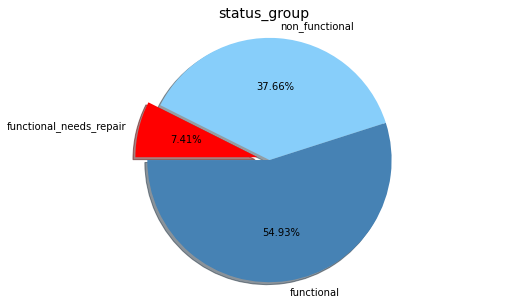

In [ ]:
# Visualising the results.

labels= ['functional','non_functional','functional_needs_repair']
colors=['steelblue', 'lightskyblue','red']
fontsize = 14
plt.figure(figsize= (9, 5))
plt.title("status_group", fontsize = fontsize)
plt.pie(status,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0,0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

There were 27178 functional waterpoints representing 54.93% , 8632 non functional waterpoints making 37.66% and 3668 functional waterpoints that need repair  making a total of 7.41%.


In [ ]:
# Checking the funders who majorly funded the waterpoints.

df_eda['funder'].value_counts()

Government Of Tanzania    8083
Danida                    2920
Hesawa                    1389
Kkkt                      1260
unknown                   1152
                          ... 
Muwasa                       1
Msigw                        1
Overland High School         1
Kadip                        1
Brown                        1
Name: funder, Length: 1593, dtype: int64

The Government of Tanzania funds the biggest number of water points 8083, while Danida follows at 2920 and Hesawa at 1389 waterpoints.

In [ ]:
# Checking the main waterpoint installers.

df_eda['installer'].value_counts()

DWE             14643
Government       1438
unknown          1157
RWE              1031
Commu             893
                ...  
Singida yetu        1
Centra govt         1
HESAWZ              1
CONCE               1
SELEPTA             1
Name: installer, Length: 1788, dtype: int64

DWE makes up about a very high percentage of the Installation followed by the government and RWE.

In [ ]:
df_eda['lga'].value_counts()

Njombe           2458
Moshi Rural      1227
Arusha Rural     1173
Kilosa           1063
Kasulu           1042
                 ... 
Kilwa              52
Tarime             39
Ilala              36
Singida Rural      17
Nyamagana           1
Name: lga, Length: 120, dtype: int64

Majority of the waterpoints are located in Njombe, Moshi Rural, Arusha, Kilosa ans Kasulu.

In [ ]:

df_eda['wpt_name'].value_counts()

none                       3368
Shuleni                    1373
Zahanati                    640
Msikitini                   463
Kanisani                    266
                           ... 
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Sukuzi                        1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 31776, dtype: int64

3368 waterpoints were not named but those with names such as Shuleni 1373, Zahanati 640, Mzikitini 463, Kanisani 266. This is interesting because the waterpoints names shows their loaction. Those located in schools are 1373, located in dispensaries are 640, mosques are 463 and churches 266.

In [ ]:
# Bar plot to show the funding entities
# Creating a user defined function for univariate visuals 
def uni_visuals(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1.2)
  if kind == 'pie':
    df_eda[column].value_counts().plot(kind=kind, autopct='%1.1f%%', figsize=(7, 6), rot=90)
  elif kind == 'bar':
    df_eda[column].value_counts().plot(kind=kind, figsize=(10, 8), rot=90)
  plt.xlabel(xlabel = xlabel, labelpad=14)
  plt.ylabel(ylabel = ylabel, labelpad=14)
  plt.title(title, y=1)
  return plt.show()

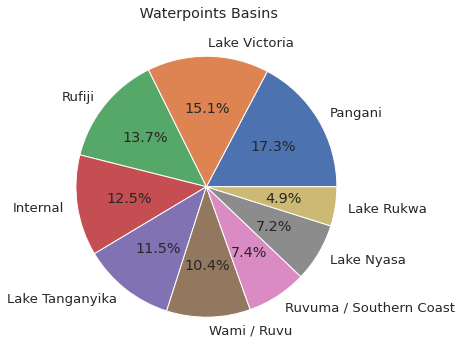

In [ ]:
# Bar chart showing whether the basins 
uni_visuals('basin', 'pie', ' Waterpoints Basins', '', '')

Pangani is the largest water basin and the lowest is Lake Rukwa water basin.

In [ ]:
# Region counts
df_eda['region'].value_counts()

Iringa           5230
Kilimanjaro      4209
Shinyanga        3701
Mbeya            3525
Morogoro         2960
Kagera           2955
Arusha           2843
Kigoma           2780
Pwani            2626
Tanga            2544
Mwanza           2397
Ruvuma           2116
Tabora           1881
Dodoma           1835
Rukwa            1743
Mtwara           1522
Manyara          1461
Singida          1041
Lindi            1006
Mara              759
Dar es Salaam     344
Name: region, dtype: int64

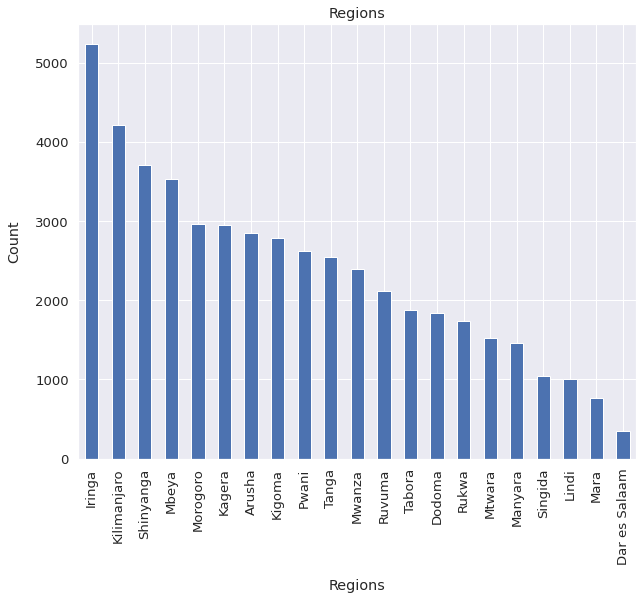

In [ ]:
# Bar Chart showing the different regions represented in our dataset 
uni_visuals('region', 'bar', 'Regions', 'Regions', 'Count')

Iringa is the geographical location where waterpoints are found and Dar es Salam is the geographical location with least numberr of waterpoints.

In [ ]:
top5_installers = df_eda['installer'].value_counts()
top5_installers

DWE             14643
Government       1438
unknown          1157
RWE              1031
Commu             893
                ...  
Singida yetu        1
Centra govt         1
HESAWZ              1
CONCE               1
SELEPTA             1
Name: installer, Length: 1788, dtype: int64

In [ ]:
# Ward with the highest number of waterpoints 
df_eda['ward'].value_counts()

Igosi        305
Imalinyi     250
Siha Kati    232
Mdandu       231
Nduruma      204
            ... 
Simbay         1
Matarawe       1
Thawi          1
Kisumwa        1
Ngaya          1
Name: ward, Length: 1891, dtype: int64

Igosi ward has the largest number of waterpoints followed by Imalinyi, Siha Kati,Mdandu and Nduruma. 

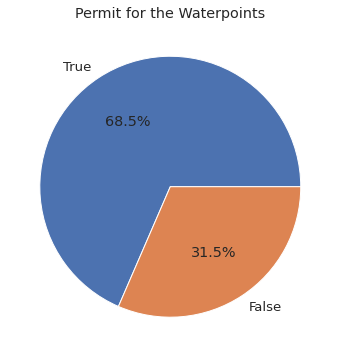

In [ ]:
# Pie chart showing whether the different waterpoints require a permit or not
uni_visuals('permit', 'pie', 'Permit for the Waterpoints', '', '')


68.5 % of the waterpoints had permit while 31.5% has no permit.

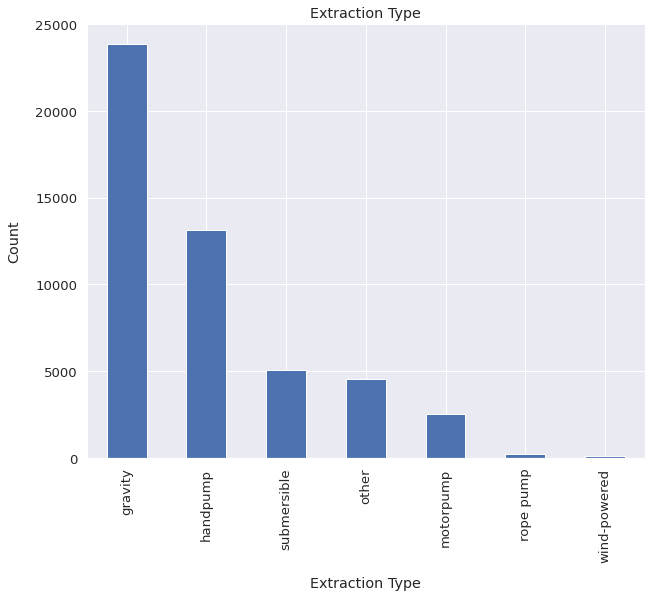

In [ ]:
# Bar chart showing the type of Extraction used at the waterpoints
uni_visuals('extraction_type_class', 'bar', 'Extraction Type', 'Extraction Type', 'Count')

Gravity was the most used method of water extraction folowed by handpump and wind-powered is the least popular water extraction type 

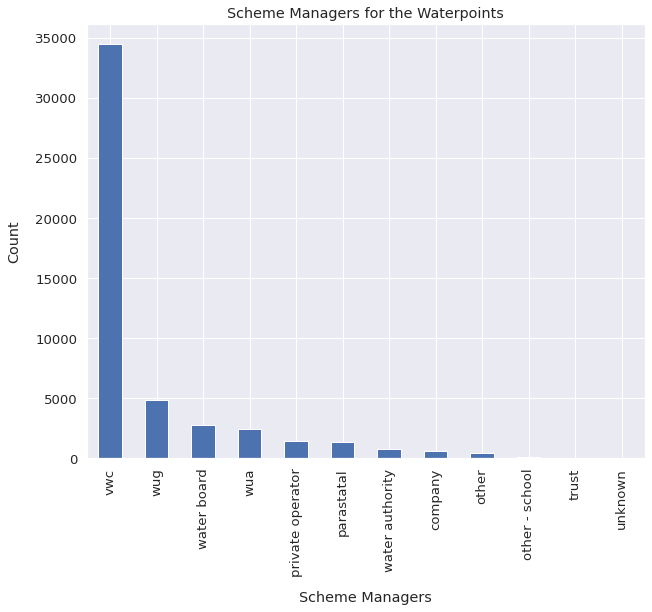

In [ ]:
# Bar chart showing the organizations incharge of scheme management
uni_visuals('management', 'bar', 'Scheme Managers for the Waterpoints', 'Scheme Managers', 'Count')

VWC is in charge of about 70% of the Waterpoints  

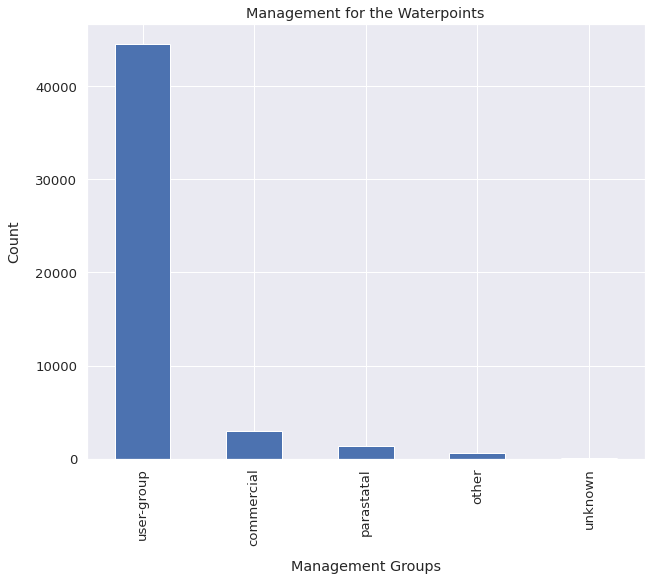

In [ ]:
# Bar chart showing the Management Groups for the waterpoints
uni_visuals('management_group', 'bar', 'Management for the Waterpoints', 'Management Groups', 'Count')

90% of the Waterpoints have user-groups as their management groups 

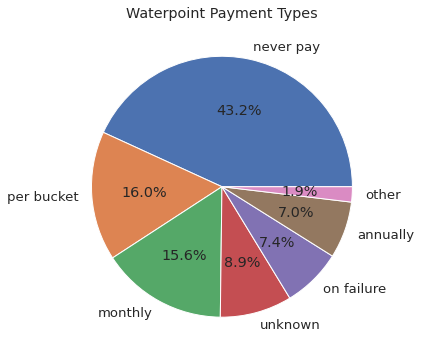

In [ ]:

# Pie chart showing the Payment Types
uni_visuals('payment_type', 'pie', 'Waterpoint Payment Types', '', '')


43.2% of the waterpoints are never paid for. This should be investigated further

15.6% of the waterpoints are paid for on a monthly basis whole 16% of them are paid for per bucket

Another aspect that requires further investigation from this analysis is the 8.9% waterpoints whose payment-type is unknown 

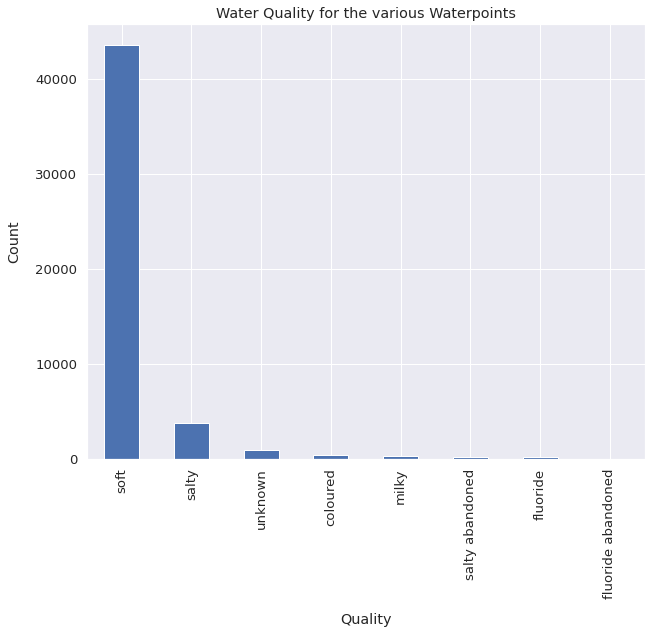

In [ ]:
# Bar chart showing the Water quality
uni_visuals('water_quality', 'bar', 'Water Quality for the various Waterpoints', 'Quality', 'Count')

88.1% of the Waterpoints have soft water while 7.6% of them have salty water

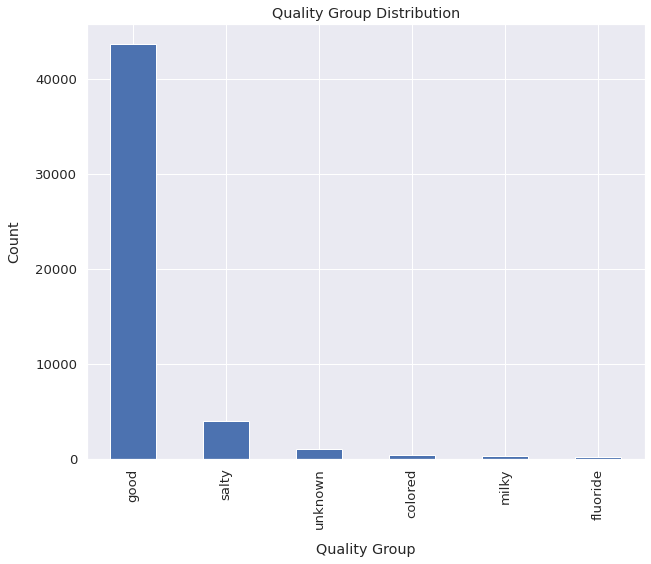

In [ ]:

# Bar chart showing the quality groups
uni_visuals('quality_group', 'bar', 'Quality Group Distribution', 'Quality Group', 'Count')

88.1% of the Waterpoints have good quality water

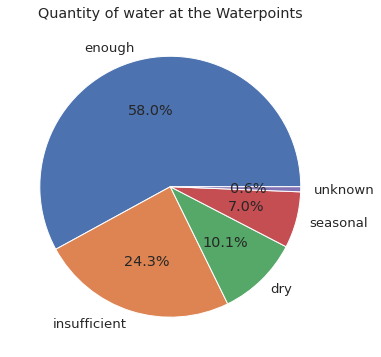

In [ ]:

# Pie chart showing the organizations incharge of scheme management
uni_visuals('quantity', 'pie', 'Quantity of water at the Waterpoints', '', '')


58.0% of the waterpoints have enough water while 24.3% of them have insuffient water 

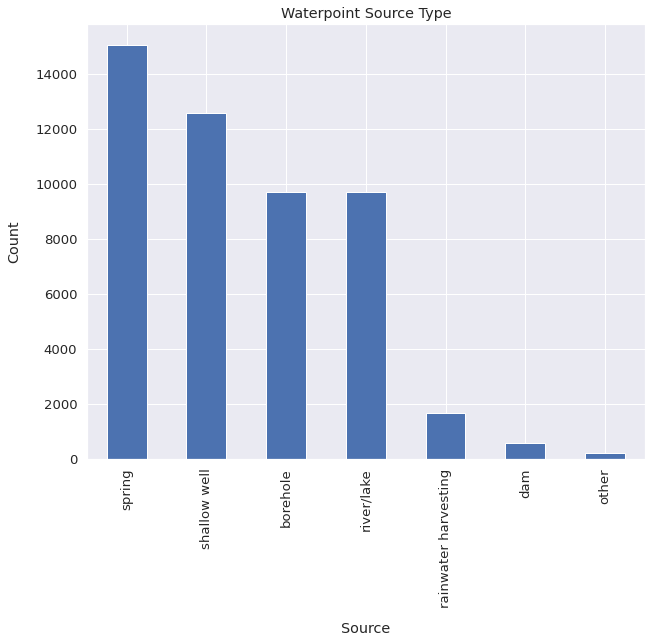

In [ ]:

# Bar chart showing the Source types for the waterpoints 
uni_visuals('source_type', 'bar', 'Waterpoint Source Type', 'Source', 'Count')


Spring and Shallow well make up the largest waterpoint source types 

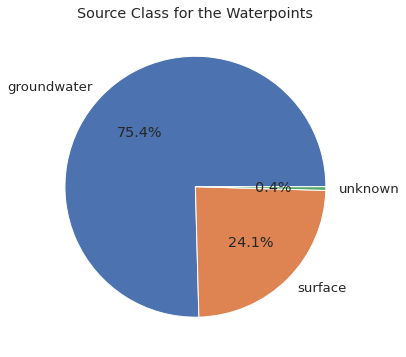

In [ ]:

# Pie chart showing the Source Class for the waterpoints 
uni_visuals('source_class', 'pie', 'Source Class for the Waterpoints', '', '')

Groundwater makes up the largest Source Class for the waterpoints at 75.4% while surface water makes up 24.1% 

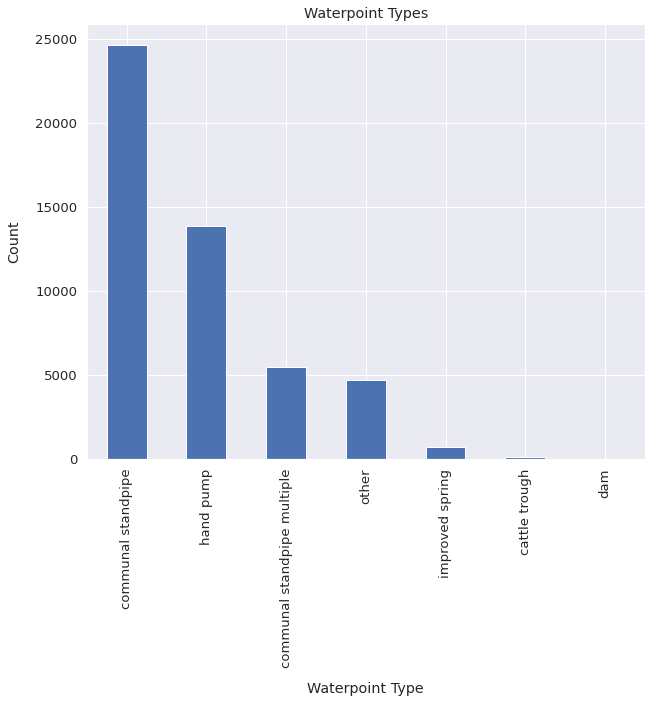

In [ ]:
# Pie chart showing the different waterpoint types
uni_visuals('waterpoint_type', 'bar', 'Waterpoint Types', 'Waterpoint Type', 'Count')

The largest waterpoint type is the communal standpipe at 49.8% followed by the handpipe 

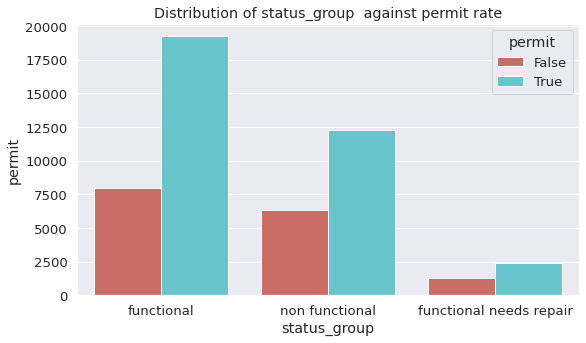

In [ ]:
#Stacked column chart for status group  agaist permit rate
plt.figure(figsize=(9, 5))
sns.countplot(x = df["status_group"], hue = df["permit"],palette = ("hls"))
plt.xlabel('status_group')
plt.ylabel('permit')
plt.title('Distribution of status_group  against permit rate') 
plt.show()

## Bivariate Analysis

Text(0, 0.5, 'amount_tsh')

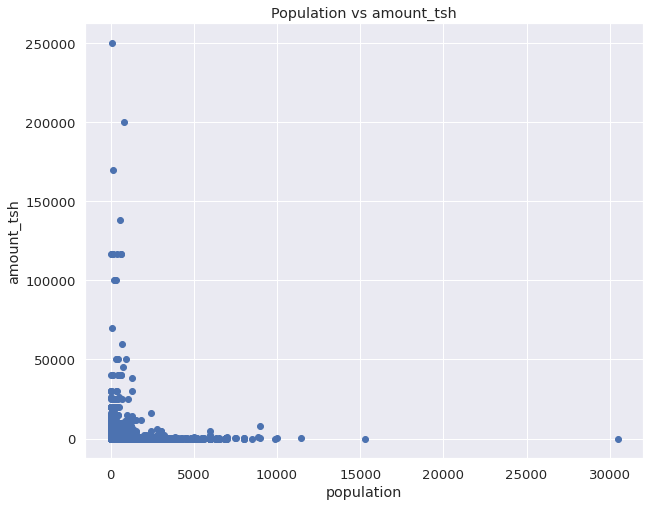

In [ ]:
# scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(df.population,df.amount_tsh)
# naminng axes
plt.title("Population vs amount_tsh")
plt.xlabel("population")
plt.ylabel("amount_tsh")

Text(0, 0.5, 'amount_tsh')

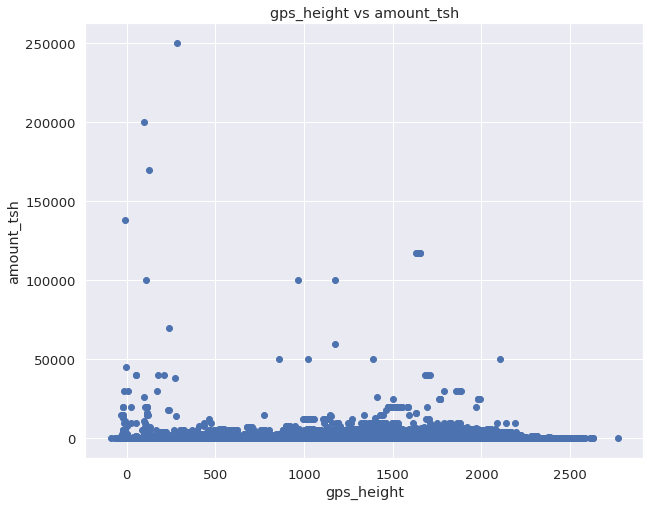

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df.gps_height, df.amount_tsh)

# labeling
plt.title("gps_height vs amount_tsh")
plt.xlabel('gps_height')
plt.ylabel('amount_tsh')

Text(0, 0.5, 'amount_tsh')

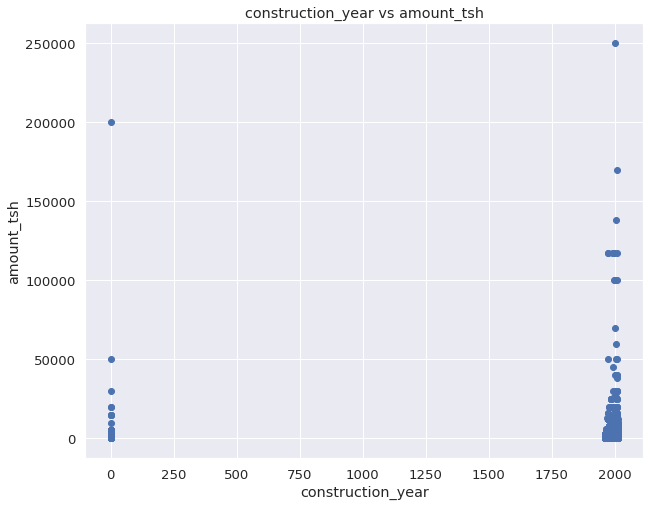

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df['construction_year'], df['amount_tsh'])

# labeling
plt.title("construction_year vs amount_tsh")
plt.xlabel('construction_year')
plt.ylabel('amount_tsh')

##Categorical verses categorical

1.Relationship between status group and the permit.

In [ ]:
pd.crosstab(df['status_group'], df['permit'])

permit                   False   True
status_group                         
functional                7956  19222
functional needs repair   1260   2408
non functional            6371  12261

From the results it can be seen that functional waterpoints that require permits are 19929 and those that do not require permits are 88805

It is also noted that functional water points that need repair and require permits are 2495 and 1301 are functional and needs repair and do not require permis to operate in the first place

Finally non funtional waterpoints with permits are 13063 while 6915 waterpoints are non functional but require permits as well

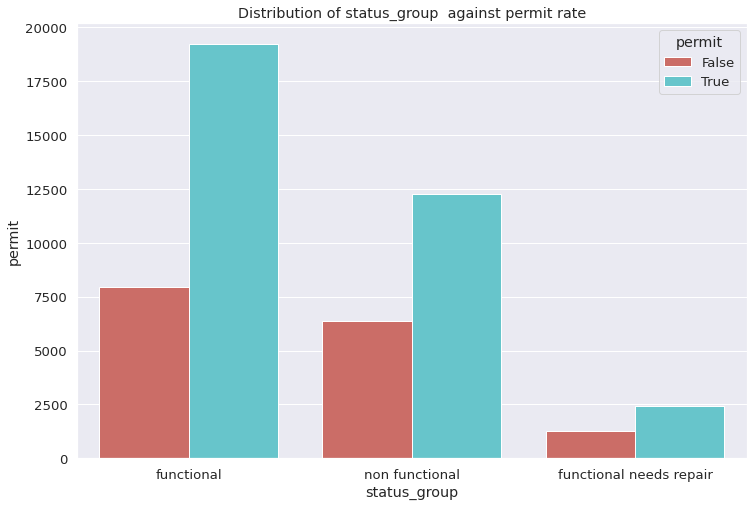

In [ ]:
# Visualization of status_ group vs permit
# Stacked column chart for status group  against permit
plt.figure(figsize=(12, 8))
sns.countplot(x = df["status_group"], hue = df["permit"],palette = ("hls"))
plt.xlabel('status_group')
plt.ylabel('permit')
plt.title('Distribution of status_group  against permit rate') 
plt.show()

2 .Relationship between status group and quality of water.

In [ ]:
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'basin',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source_type', 'source_class', 'waterpoint_type'],
      dtype='object')

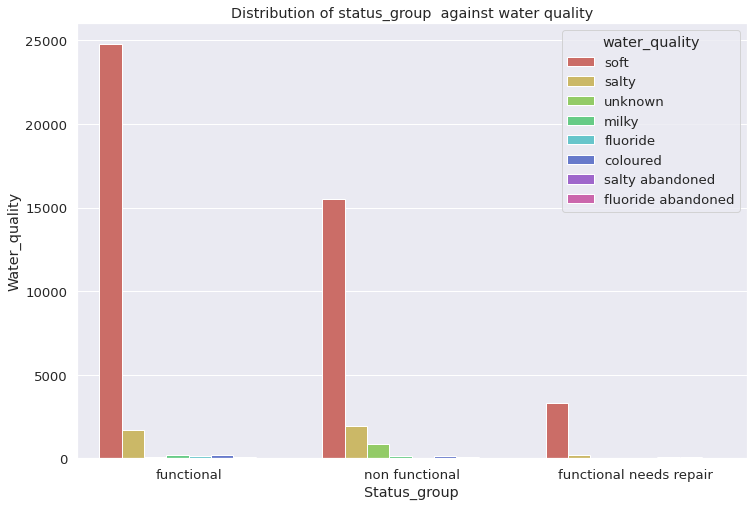

In [ ]:
# Stacked column chart for status group  against water quality
plt.figure(figsize=(12, 8))
sns.countplot(x = df["status_group"], hue = df["water_quality"],palette = ("hls"))
plt.xlabel('Status_group')
plt.ylabel('Water_quality')
plt.title('Distribution of status_group  against water quality') 
plt.show()

 1. 25968 functional waterpoints have soft water and 1927 functional waterpoints have salty water.

 2. 3456 functional waterpoints that needs repair have soft water and 185 of functional waterpoints that needs repairs have salty water.

 3. Non functional waterpoints that have soft water are 16455 and 2161 have salty water.

 3. Relationship bewteeen status group and the quantity of water

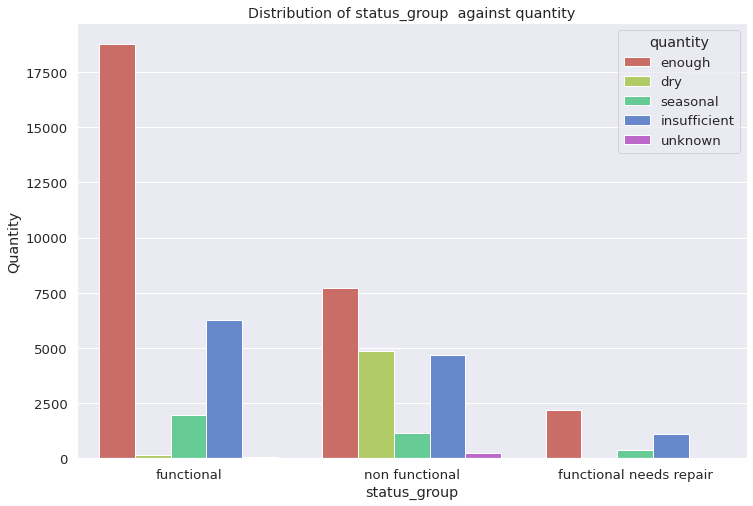

In [ ]:
# status group vs quantity
# Stacked column chart for status group  against permit
plt.figure(figsize=(12, 8))
sns.countplot(x = df["status_group"], hue = df["quantity"],palette = ("hls"))
plt.xlabel('status_group')
plt.ylabel('Quantity')
plt.title('Distribution of status_group  against quantity') 
plt.show()

In [ ]:
pd.crosstab(df['status_group'], df['quantity'])

quantity                  dry  enough  insufficient  seasonal  unknown
status_group                                                          
functional                127   18770          6255      1962       64
functional needs repair    19    2192          1099       356        2
non functional           4869    7716          4667      1136      244

1. 19891 of the functional waterpoints have enough water, 142 are dry, 6551 are having insufficient water and 2044 are seasonal.

2. 2271 of the functional  waterpoints have enough water needs repair, 19 are dry, 1128 have insufficient water and needs repair and 375 are seasonal and also needs repair.

3. 5403 of the non functional well are dry, 8249 are non funcional and have enough water, 48450 of the non functional waterpoints have insufficient water and 1173 are seasonal.

4. Relationship between the quantity of water and method of extraction.

In [ ]:
pd.crosstab(df['quantity'],df['extraction_type_class'])

extraction_type_class  gravity  handpump  motorpump  other  rope pump  \
quantity                                                                
dry                       1961       982        510   1082         28   
enough                   13920      7807       1490   1993        156   
insufficient              6041      3227        484   1056         19   
seasonal                  1808      1064         26    375          9   
unknown                    110        80          4     74          0   

extraction_type_class  submersible  wind-powered  
quantity                                          
dry                            436            16  
enough                        3261            51  
insufficient                  1162            32  
seasonal                       170             2  
unknown                         39             3

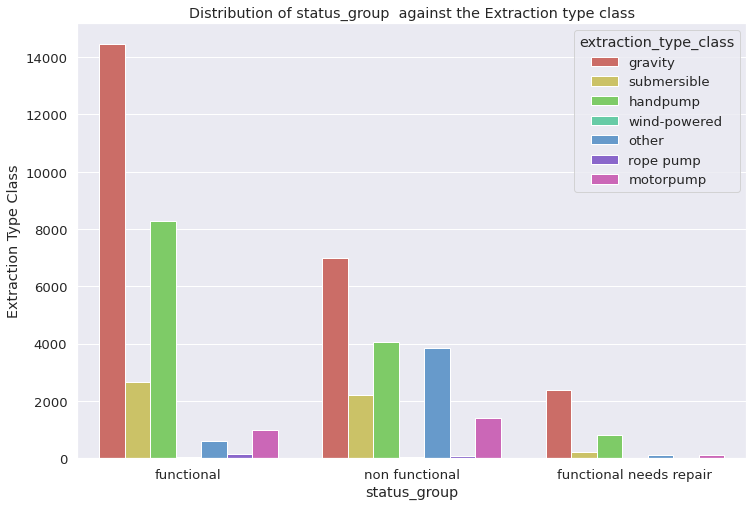

In [ ]:
# Stacked column chart for status group  against permit
plt.figure(figsize=(12, 8))
sns.countplot(x = df["status_group"], hue = df["extraction_type_class"],palette = ("hls"))
plt.xlabel('status_group')
plt.ylabel('Extraction Type Class')
plt.title('Distribution of status_group  against the Extraction type class') 
plt.show()

1. for waterpoints that have enough water 14298 uses gravity for extraction,8497 uses handpump,1526 uses motorpump and 3733 uses submisible for extraction.

2. for water points with insufficient water;6191 uses gravity,3403 usee handpump,
 while 1222 uses submercsible.

3. For seasonal waterpoints,1895 uses gravity,1084 uses handpump and 174 uses subersible.

4. gravity and  handpump are mostly used for extration of water from  water points.

 5. Realtionship between the status group and the payment type.

In [ ]:
# status group vs payment type
pd.crosstab(df['status_group'], df['payment_type'])

payment_type             annually  monthly  never pay  on failure  other  \
status_group                                                               
functional                   2613     5063       9433        2276    535   
functional needs repair       240      897       1509         249    110   
non functional                627     1766      10414        1121    288   

payment_type             per bucket  unknown  
status_group                                  
functional                     5304     1954  
functional needs repair         374      289  
non functional                 2250     2166

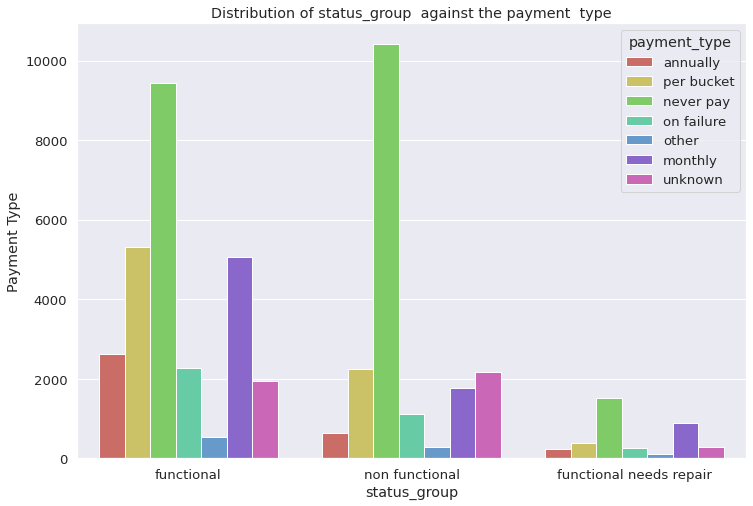

In [ ]:
# Stacked column chart for status group  against the payment type
plt.figure(figsize=(12, 8))
sns.countplot(x = df["status_group"], hue = df["payment_type"],palette = ("hls"))
plt.xlabel('status_group')
plt.ylabel('Payment Type')
plt.title('Distribution of status_group  against the payment  type') 
plt.show()

1. For most waterpoints  whether functional, functional needs repair or non functional the type of payment used is never pay, that is water is not charged.

2. For the functional waterpoints,9732 uses never pay as payment type,5742 uses bucket payment_type ,5107 waterpoints uses monthly payment,2661 uses annuall payments.

3. For functional needs repair wataerpoints,1527 uses neverpay payment type,898 uses minthly,383 uses bucket payment type .

4. For the nonfunctional waterpoints,10791 uses never pay type of payment,1793 uses monthly type and 2406 uses bucket

6. **Relationship between the status group and the scheme management.**


In [ ]:
pd.crosstab(df['status_group'], df['scheme_management'])

scheme_management        Company  None  Other  Parastatal  Private operator  \
status_group                                                                  
functional                   509     1    197         730               499   
functional needs repair       35     0     13         171                23   
non functional               486     0    171         400               285   

scheme_management        SWC  Trust    VWC   WUA   WUG  Water Board  \
status_group                                                          
functional                20     45  17291  1953  2473         1955   
functional needs repair    1      5   2024   230   625          103   
non functional            76     21  13883   614  1157          553   

scheme_management        Water authority  
status_group                              
functional                          1505  
functional needs repair              438  
non functional                       986

1. **17833** functional waterpoints are under the management of **VWC**,**2941** functional waterpoints are under the management of **WUG**,**1987** are under Board,**1965** are under **WUA** and **1519** are under **Authority** management.

2. For the functional but needs repair waterpoints, **2091** are under the management of **VWC**,**664** are under **WUG**,441 are under **Authority**

3,. Most waterpoints managed by SWC are non-functional

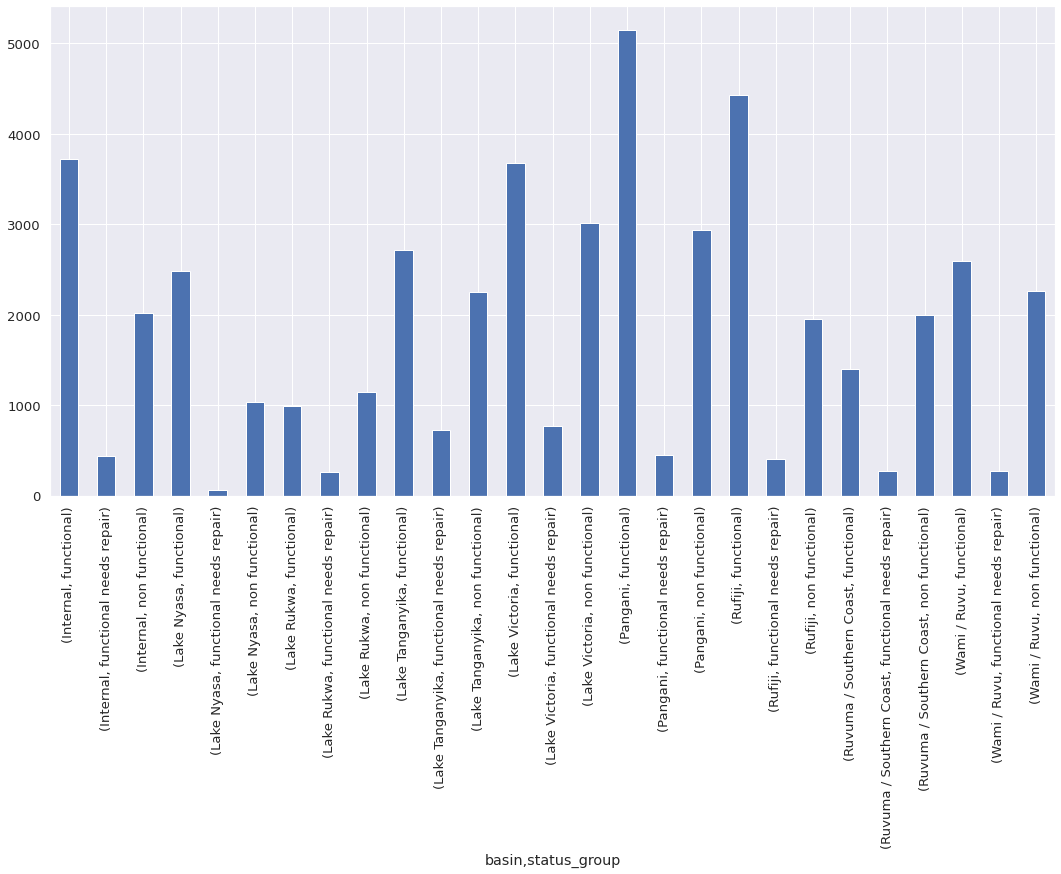

In [ ]:
plt.figure(figsize=(18, 9))
df.groupby(['basin','status_group']).size().plot(kind="bar")


 The basin associated with the highest  number of functional waterpoints  is Pangani and Lake victoria is the basin associated with the highest number of non-functional waterpoint. 
 From the initial analysis pangani also has the highest number of waterpoints in total,however from our background research pangani is located near Mt kilimanjaro which is a highland. on the other hand lake victoria  is found in a lowland area  and due to gravity we can explain the differences in water availability in various waterpoints  associated  these basins.



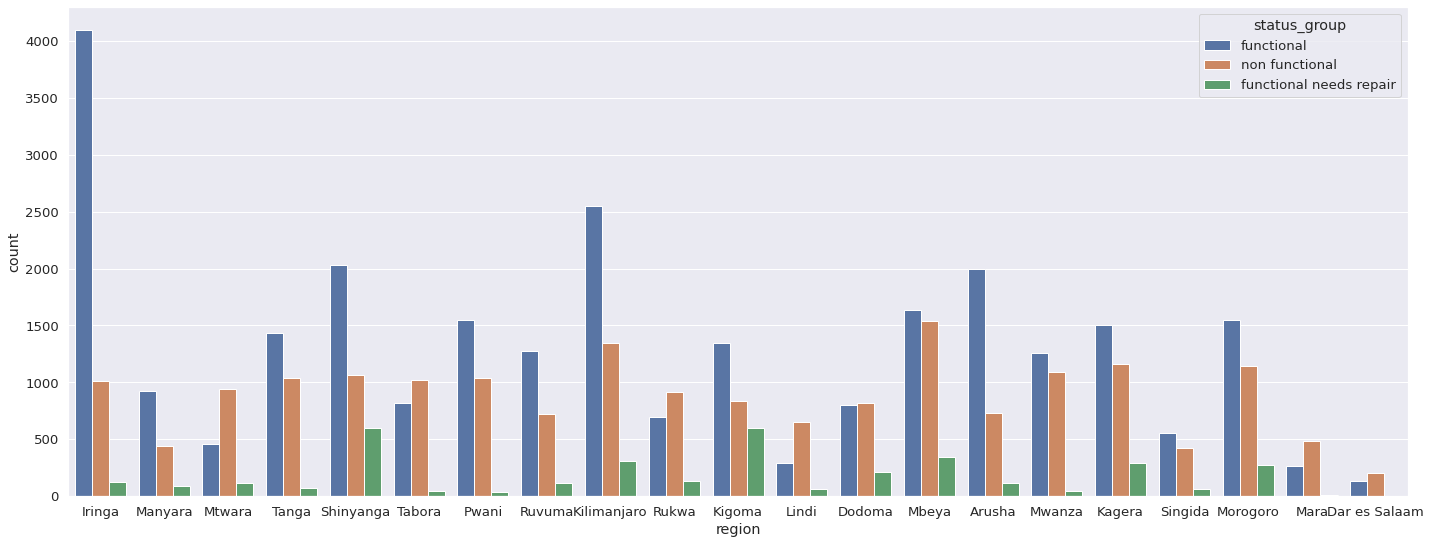

In [ ]:
#looking at regions
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='region',hue='status_group')

## Data pre-processing

In [ ]:
# label encoding 
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

df['status_group']=en.fit_transform(df['status_group'])

In [ ]:
# selecting categorical columns
model=df.copy()
new=model.iloc[:,[1,2,5,16,17,19,21,22,23,24,25,26,27,28,29,30,31]]
new.head()

status_group  amount_tsh  gps_height  population scheme_management permit  \
0             0      6000.0        1390         109               VWC  False   
2             0        25.0         686         250               VWC   True   
3             2         0.0         263          58               VWC   True   
5             0        20.0           0           1               VWC   True   
6             2         0.0           0           0               VWC   True   

  extraction_type extraction_type_class management management_group  \
0         gravity               gravity        vwc       user-group   
2         gravity               gravity        vwc       user-group   
3     submersible           submersible        vwc       user-group   
5     submersible           submersible        vwc       user-group   
6          swn 80              handpump        vwc       user-group   

  payment_type water_quality quality_group quantity source_type source_class  \
0     annually          soft          good   enough      spring  groundwater   
2   per bucket          soft          good   enough         dam      surface   
3    never pay          soft          good      dry    borehole  groundwater   
5   per bucket         salty         salty   enough       other      unknown   
6    never pay          soft          good   enough    borehole  groundwater   

               waterpoint_type  
0           communal standpipe  
2  communal standpipe multiple  
3  communal standpipe multiple  
5  communal standpipe multiple  
6                    hand pump

In [ ]:
categorical=new.drop(['amount_tsh','gps_height','population','status_group'],1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
categorical_encoded=categorical.apply(en.fit_transform)
new_df=categorical_encoded.join(df[['amount_tsh','gps_height','population','status_group']])
new_df=pd.DataFrame(new_df)
new_df.head()

scheme_management  permit  extraction_type  extraction_type_class  \
0                  7       0                3                      0   
2                  7       1                3                      0   
3                  7       1               14                      5   
5                  7       1               14                      5   
6                  7       1               15                      1   

   management  management_group  payment_type  water_quality  quality_group  \
0           7                 4             0              6              2   
2           7                 4             5              6              2   
3           7                 4             2              6              2   
5           7                 4             5              4              4   
6           7                 4             2              6              2   

   quantity  source_type  source_class  waterpoint_type  amount_tsh  \
0         1            6             0                1      6000.0   
2         1            1             1                2        25.0   
3         0            0             0                2         0.0   
5         1            2             2                2        20.0   
6         1            0             0                4         0.0   

   gps_height  population  status_group  
0        1390         109             0  
2         686         250             0  
3         263          58             2  
5           0           1             0  
6           0           0             2

In [ ]:
new_df.head()

scheme_management  permit  extraction_type  extraction_type_class  \
0                  7       0                3                      0   
2                  7       1                3                      0   
3                  7       1               14                      5   
5                  7       1               14                      5   
6                  7       1               15                      1   

   management  management_group  payment_type  water_quality  quality_group  \
0           7                 4             0              6              2   
2           7                 4             5              6              2   
3           7                 4             2              6              2   
5           7                 4             5              4              4   
6           7                 4             2              6              2   

   quantity  source_type  source_class  waterpoint_type  amount_tsh  \
0         1            6             0                1      6000.0   
2         1            1             1                2        25.0   
3         0            0             0                2         0.0   
5         1            2             2                2        20.0   
6         1            0             0                4         0.0   

   gps_height  population  status_group  
0        1390         109             0  
2         686         250             0  
3         263          58             2  
5           0           1             0  
6           0           0             2

In [ ]:
numerical = new_df["status_group"]

In [ ]:
features=new_df.iloc[:, :16]

In [ ]:
features.head()

scheme_management  permit  extraction_type  extraction_type_class  \
0                  7       0                3                      0   
2                  7       1                3                      0   
3                  7       1               14                      5   
5                  7       1               14                      5   
6                  7       1               15                      1   

   management  management_group  payment_type  water_quality  quality_group  \
0           7                 4             0              6              2   
2           7                 4             5              6              2   
3           7                 4             2              6              2   
5           7                 4             5              4              4   
6           7                 4             2              6              2   

   quantity  source_type  source_class  waterpoint_type  amount_tsh  \
0         1            6             0                1      6000.0   
2         1            1             1                2        25.0   
3         0            0             0                2         0.0   
5         1            2             2                2        20.0   
6         1            0             0                4         0.0   

   gps_height  population  
0        1390         109  
2         686         250  
3         263          58  
5           0           1  
6           0           0

In [ ]:
features

scheme_management  permit  extraction_type  extraction_type_class  \
0                      7       0                3                      0   
2                      7       1                3                      0   
3                      7       1               14                      5   
5                      7       1               14                      5   
6                      7       1               15                      1   
...                  ...     ...              ...                    ...   
59395                 10       1                3                      0   
59396                  7       1                3                      0   
59397                  7       0               15                      1   
59398                  7       1                8                      1   
59399                  7       1                8                      1   

       management  management_group  payment_type  water_quality  \
0               7                 4             0              6   
2               7                 4             5              6   
3               7                 4             2              6   
5               7                 4             5              4   
6               7                 4             2              6   
...           ...               ...           ...            ...   
59395           9                 4             5              6   
59396           7                 4             0              6   
59397           7                 4             1              1   
59398           7                 4             2              6   
59399           7                 4             3              4   

       quality_group  quantity  source_type  source_class  waterpoint_type  \
0                  2         1            6             0                1   
2                  2         1            1             1                2   
3                  2         0            0             0                2   
5                  4         1            2             2                2   
6                  2         1            0             0                4   
...              ...       ...          ...           ...              ...   
59395              2         1            6             0                1   
59396              2         1            4             1                1   
59397              1         1            0             0                4   
59398              2         2            5             0                4   
59399              4         1            5             0                4   

       amount_tsh  gps_height  population  
0          6000.0        1390         109  
2            25.0         686         250  
3             0.0         263          58  
5            20.0           0           1  
6             0.0           0           0  
...           ...         ...         ...  
59395        10.0        1210         125  
59396      4700.0        1212          56  
59397         0.0           0           0  
59398         0.0           0           0  
59399         0.0         191         150  

[49478 rows x 16 columns]

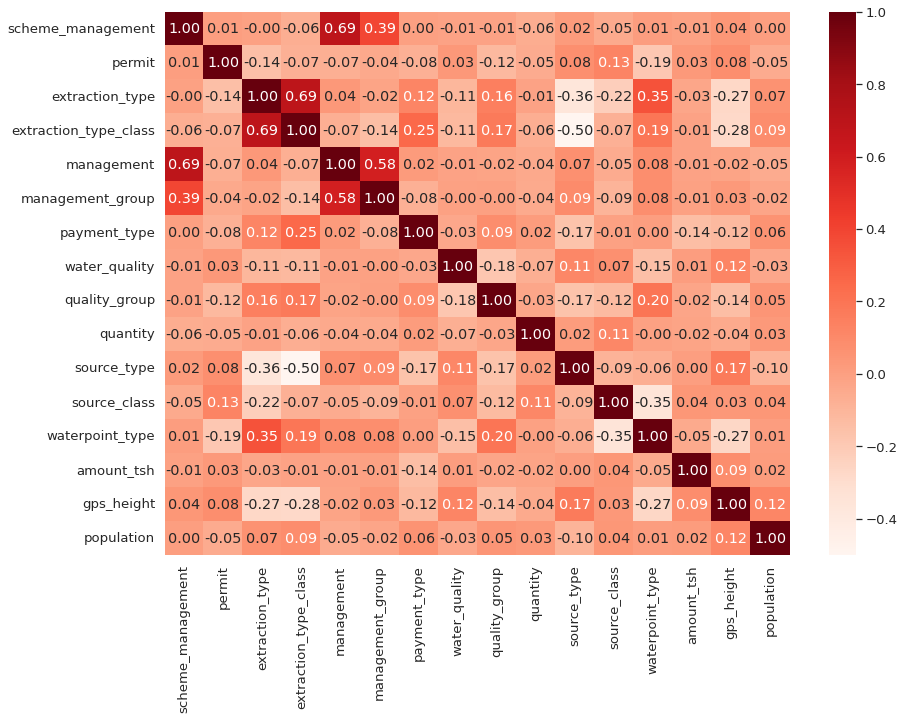

In [ ]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(features.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

In [ ]:
features=features.drop(['extraction_type_class','management','scheme_management'], 1)

In [ ]:
numerical.head()

0    0
2    0
3    2
5    0
6    2
Name: status_group, dtype: int64

## LDA

In [ ]:
feat=features #dependent variables
label=numerical # target variable 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
en=LDA()

lda=en.fit(feat,label)
lda_feat=en.transform(feat)

lda.coef_

feat_imp=pd.DataFrame(index=feat.columns.values, data=lda.coef_[0].T)
feat_imp.sort_values(0,ascending=False)

0
quantity          0.155340
permit            0.036141
source_type       0.015258
payment_type      0.002552
gps_height        0.000117
population        0.000023
amount_tsh        0.000017
extraction_type  -0.003051
management_group -0.003071
water_quality    -0.027826
waterpoint_type  -0.092615
quality_group    -0.108941
source_class     -0.169672

In [ ]:
dataset = features[['quantity','gps_height','amount_tsh','source_type','population','permit']] # Selected Variables after LDA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled=scaler.fit_transform(dataset)

In [ ]:
scaled=pd.DataFrame(scaled, index=dataset.index, columns=dataset.columns)

In [ ]:
scaled

quantity  gps_height  amount_tsh  source_type  population    permit
0     -0.390605    1.007903    2.013636     0.916259   -0.137579 -1.474555
2     -0.390605    0.000375   -0.117639    -1.373880    0.163464  0.678171
3     -1.692570   -0.605001   -0.126557    -1.831907   -0.246467  0.678171
5     -0.390605   -0.981393   -0.119423    -0.915852   -0.368165  0.678171
6     -0.390605   -0.981393   -0.126557    -1.831907   -0.370300  0.678171
...         ...         ...         ...          ...         ...       ...
59395 -0.390605    0.750297   -0.122990     0.916259   -0.103418  0.678171
59396 -0.390605    0.753159    1.549928     0.000204   -0.250737  0.678171
59397 -0.390605   -0.981393   -0.126557    -1.831907   -0.370300 -1.474555
59398  0.911360   -0.981393   -0.126557     0.458231   -0.370300  0.678171
59399 -0.390605   -0.708044   -0.126557     0.458231   -0.050042  0.678171

[49478 rows x 6 columns]

In [ ]:
data_frame = scaled.join(new['status_group'])
data_frame.head()

quantity  gps_height  amount_tsh  source_type  population    permit  \
0 -0.390605    1.007903    2.013636     0.916259   -0.137579 -1.474555   
2 -0.390605    0.000375   -0.117639    -1.373880    0.163464  0.678171   
3 -1.692570   -0.605001   -0.126557    -1.831907   -0.246467  0.678171   
5 -0.390605   -0.981393   -0.119423    -0.915852   -0.368165  0.678171   
6 -0.390605   -0.981393   -0.126557    -1.831907   -0.370300  0.678171   

   status_group  
0             0  
2             0  
3             2  
5             0  
6             2

## Defining our feature and target variables

In [ ]:
# Defining our feature and target variables.
X = scaled
y = numerical 

In [ ]:
X

quantity  gps_height  amount_tsh  source_type  population    permit
0     -0.390605    1.007903    2.013636     0.916259   -0.137579 -1.474555
2     -0.390605    0.000375   -0.117639    -1.373880    0.163464  0.678171
3     -1.692570   -0.605001   -0.126557    -1.831907   -0.246467  0.678171
5     -0.390605   -0.981393   -0.119423    -0.915852   -0.368165  0.678171
6     -0.390605   -0.981393   -0.126557    -1.831907   -0.370300  0.678171
...         ...         ...         ...          ...         ...       ...
59395 -0.390605    0.750297   -0.122990     0.916259   -0.103418  0.678171
59396 -0.390605    0.753159    1.549928     0.000204   -0.250737  0.678171
59397 -0.390605   -0.981393   -0.126557    -1.831907   -0.370300 -1.474555
59398  0.911360   -0.981393   -0.126557     0.458231   -0.370300  0.678171
59399 -0.390605   -0.708044   -0.126557     0.458231   -0.050042  0.678171

[49478 rows x 6 columns]

In [ ]:
y

0        0
2        0
3        2
5        0
6        2
        ..
59395    0
59396    0
59397    0
59398    0
59399    0
Name: status_group, Length: 49478, dtype: int64

In [ ]:
# Fixing the class imbalance in our target variable using the smote technique.
from imblearn.over_sampling import SMOTE

X,y=SMOTE().fit_resample(X,y)

We used SMOTE Oversampling to deal with the class imbalance in our target variable because of the following reasons; 
1. We have one minority class from the 3 class and SMOTE Oversampling generates synthetic samples that specifically caters to our minority class
2. This algorithm overcomes the overfitting problem that comes with random Oversampling 


In [ ]:
y

0        0
1        0
2        2
3        0
4        2
        ..
81529    2
81530    2
81531    2
81532    2
81533    2
Name: status_group, Length: 81534, dtype: int64

In [ ]:
y.value_counts()

0    27178
2    27178
1    27178
Name: status_group, dtype: int64

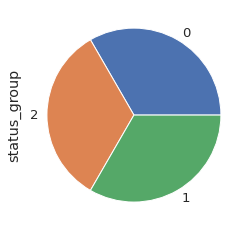

In [ ]:
y.value_counts().plot(kind='pie')

In [ ]:


# Splitting our data into the train and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

By default, logistic regression cannot be used for classification tasks that have more than two class labels; multi-class classification.

It requires modification in order to support multi-class classification problems

A popular approach for adapting logistic regression to multi-class classification problems is to split the multi-class classification problem into multiple binary classification problems and fit a standard logistic regression model on each subproblem. Techniques of this type include one-vs-rest and one-vs-one wrapper models.

In [ ]:
# Importing the Logistic Regression algorithm since this is a multinomial classification challenge 

from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

For small datasets, ‘liblinear’ is a good choice

‘sag’ and ‘saga’ are faster for large ones - our dataset is neither to large or too small

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes

l2 is the penalty term, apart from being the defaut term, it works well with 'lbfgs'

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Making our prediction using our trained model.

y_pred=model.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 0])

In [ ]:
# Evaluating the model.

from sklearn.metrics import accuracy_score, confusion_matrix, explained_variance_score,classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.4212419770246515
[[3319 1637 3175]
 [3059 2278 2810]
 [1653 1823 4707]]
-0.7385630342556357
              precision    recall  f1-score   support

           0       0.41      0.41      0.41      8131
           1       0.40      0.28      0.33      8147
           2       0.44      0.58      0.50      8183

    accuracy                           0.42     24461
   macro avg       0.42      0.42      0.41     24461
weighted avg       0.42      0.42      0.41     24461



In [ ]:
# Optimizing the model.

from sklearn.model_selection import GridSearchCV

model1 = LogisticRegression()
param_grid = [{'penalty': ['l1', 'l2'], 
               'C': np.logspace(0, 4, 5),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear','saga'],
               'max_iter' : [5, 10]
               }
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model1, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Fitting grid search
best_clf = clf.fit(X_train, y_train)
#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])
print('Best Solver:', best_clf.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_clf.best_estimator_.get_params()['max_iter'])
print('best_score',best_clf.best_score_)

Best Penalty: l2
Best C: 10.0
Best Solver: lbfgs
Best max_iter: 5
best_score 0.43188543996311013


In [ ]:
model1 =LogisticRegression(penalty='l2',C=1, solver='lbfgs',max_iter=5, random_state=0)
model1.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=5, random_state=0)

In [ ]:
y_pred=model1.predict(X_test)
y_pred

array([1, 2, 2, ..., 2, 2, 0])

In [ ]:
print(f'Train Accuracy: {model1.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {model1.score(X_test, y_test):.2f}')

Train Accuracy: 0.43
Test Accuracy: 0.43


In [ ]:
# predicting using logistic regression
y_pred1 =np.round(model1.predict(X_test),decimals=1)
y_pred1

array([1, 2, 2, ..., 2, 2, 0])

In [ ]:
#comparing the actual values verses the predicted ones
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})

comparison_frame

Actual  Predicted
71453       1          1
78923       2          2
68430       1          2
4402        0          0
70115       1          1
...       ...        ...
14930       2          2
60749       1          0
36625       0          2
13618       2          2
25211       0          0

[24461 rows x 2 columns]

In [ ]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(explained_variance_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.4263112710028208
[[3481 1658 2992]
 [3187 2449 2511]
 [1778 1907 4498]]
-0.7316930225366716
              precision    recall  f1-score   support

           0       0.41      0.43      0.42      8131
           1       0.41      0.30      0.35      8147
           2       0.45      0.55      0.49      8183

    accuracy                           0.43     24461
   macro avg       0.42      0.43      0.42     24461
weighted avg       0.42      0.43      0.42     24461



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)



In [ ]:
# modell fitting
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# model evaluation

classifier_rf.oob_score_

0.5517670352005326

### Hyperparameter tuning

In [ ]:
# grid search cv
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 24.8 s, sys: 1.5 s, total: 26.3 s
Wall time: 14min 42s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_ # average of the multiple cross validation

0.6849297987939412

In [ ]:
# Extracting the best params
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_best1 = RandomForestClassifier(max_depth=20, min_samples_leaf=5,
n_jobs=-1, random_state=42)
rf_best1 

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_best1.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
# Making predictions
y_pred2 =rf_best1.predict(X_test)
y_pred2


array([1, 1, 1, ..., 1, 2, 2])

In [ ]:
# Checking the Accuracy

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))


0.6912636441682679
[[5364 1674 1093]
 [1277 6428  442]
 [1943 1123 5117]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64      8131
           1       0.70      0.79      0.74      8147
           2       0.77      0.63      0.69      8183

    accuracy                           0.69     24461
   macro avg       0.70      0.69      0.69     24461
weighted avg       0.70      0.69      0.69     24461



In [ ]:
#comparing the actual values verses the predicted ones
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame

Actual  Predicted
71453       1          1
78923       2          1
68430       1          1
4402        0          0
70115       1          1
...       ...        ...
14930       2          2
60749       1          1
36625       0          1
13618       2          2
25211       0          2

[24461 rows x 2 columns]

# LightGBM Classifier 

In [ ]:
# Fitting our lightGBM classifier

import lightgbm as lgb

lgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgb.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.865581	training's multi_logloss: 0.865581	valid_0's multi_logloss: 0.870761	valid_0's multi_logloss: 0.870761
[40]	training's multi_logloss: 0.810677	training's multi_logloss: 0.810677	valid_0's multi_logloss: 0.820702	valid_0's multi_logloss: 0.820702
[60]	training's multi_logloss: 0.784739	training's multi_logloss: 0.784739	valid_0's multi_logloss: 0.799036	valid_0's multi_logloss: 0.799036
[80]	training's multi_logloss: 0.76172	training's multi_logloss: 0.76172	valid_0's multi_logloss: 0.779066	valid_0's multi_logloss: 0.779066
[100]	training's multi_logloss: 0.745952	training's multi_logloss: 0.745952	valid_0's multi_logloss: 0.76633	valid_0's multi_logloss: 0.76633


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
# Making predictions

y_pred3=lgb.predict(X_test)

In [ ]:
# Checking for overfitting.

print('Training accuracy {:.4f}'.format(lgb.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(lgb.score(X_test,y_test)))

Training accuracy 0.6729
Testing accuracy 0.6618


In [ ]:
# Checking the Accuracy

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

0.661829033972446
[[4801 2083 1247]
 [1070 6488  589]
 [1829 1454 4900]]
              precision    recall  f1-score   support

           0       0.62      0.59      0.61      8131
           1       0.65      0.80      0.71      8147
           2       0.73      0.60      0.66      8183

    accuracy                           0.66     24461
   macro avg       0.67      0.66      0.66     24461
weighted avg       0.67      0.66      0.66     24461



#KNN

In [ ]:
# Fitting our KNN classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      8131
           1       0.70      0.79      0.74      8147
           2       0.77      0.63      0.69      8183

    accuracy                           0.69     24461
   macro avg       0.70      0.69      0.69     24461
weighted avg       0.70      0.69      0.69     24461



In [ ]:
# hyper parameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
neighbor_range = np.arange(1, 41)
knn = KNeighborsClassifier()

params = {'n_neighbors' : neighbor_range,
         'weights' : ['uniform', 'distance'],
         'metric' : ['manhattan', 'euclidean', 'minkowski','hamming']}

kfolds = KFold(n_splits = 5)
rscv = RandomizedSearchCV(knn, params, random_state = 0)
rscv.fit(X_train, y_train)
print("Best parameters:", rscv.best_params_)

Best parameters: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}


In [ ]:
# Using the best parameters
knn1=KNeighborsClassifier(n_neighbors=8, weights="distance", metric='manhattan')
knn1.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [ ]:
# Checking for overfitting.

print('Training accuracy {:.4f}'.format(knn1.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(knn1.score(X_test,y_test)))

Training accuracy 0.8285
Testing accuracy 0.6656


In [ ]:
# Making predictions
y_pred4 = knn1.predict(X_test)
y_pred4

array([0, 1, 0, ..., 0, 2, 0])

In [ ]:
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

0.6655901230530232
[[5442 1365 1324]
 [1999 5569  579]
 [2103  810 5270]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62      8131
           1       0.72      0.68      0.70      8147
           2       0.73      0.64      0.69      8183

    accuracy                           0.67     24461
   macro avg       0.67      0.67      0.67     24461
weighted avg       0.67      0.67      0.67     24461



# Neural Network


In [ ]:
from sklearn.neural_network import MLPClassifier
# Creating our model
mlp = MLPClassifier()

#fitting the model 

mlp.fit(X_train, y_train)

MLPClassifier()

In [ ]:
#predicting using the model.
y_pred = mlp.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 2, 1])

In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5828870446833735
[[4357 2671 1103]
 [1783 5789  575]
 [2140 1931 4112]]
              precision    recall  f1-score   support

           0       0.53      0.54      0.53      8131
           1       0.56      0.71      0.62      8147
           2       0.71      0.50      0.59      8183

    accuracy                           0.58     24461
   macro avg       0.60      0.58      0.58     24461
weighted avg       0.60      0.58      0.58     24461



In [ ]:
# tuning the model
param_grid = {
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam', 'sgd', 'lbfgs']
}

#Using the classifier along with grid search:
mlp=MLPClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(mlp, param_grid = param_grid, cv= 5, verbose = 0, scoring = 'neg_mean_squared_error' )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)



In [ ]:
#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [ ]:
# Getting the best parameters
best_clf.best_params_

{'C': 1.0, 'max_iter': 5, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
#Using the best parameters from hyperparameter tuning:
neural_best = MLPClassifier(activation = 'identity', alpha =  0.0001, hidden_layer_sizes = (10,10,10),
                               learning_rate = 'constant', solver = 'adam', random_state=42)

In [ ]:
#Fitting the model:
neural_best.fit(X_train,y_train )

MLPClassifier(activation='identity', hidden_layer_sizes=(10, 10, 10),
              random_state=42)

In [ ]:
#Predicting values:
y_pred5 = neural_best.predict(X_test)

In [ ]:
# Checking for overfitting.

print('Training accuracy {:.4f}'.format(neural_best.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(neural_best.score(X_test,y_test)))

Training accuracy 0.4166
Testing accuracy 0.4160


In [ ]:
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(explained_variance_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

0.4159682760312334
[[2987 1554 3590]
 [2520 2172 3455]
 [1467 1700 5016]]
-0.7421110047623876
              precision    recall  f1-score   support

           0       0.43      0.37      0.40      8131
           1       0.40      0.27      0.32      8147
           2       0.42      0.61      0.50      8183

    accuracy                           0.42     24461
   macro avg       0.41      0.42      0.40     24461
weighted avg       0.41      0.42      0.40     24461



In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.422977 using {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.422977 (0.006703) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.422977 (0.006695) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.422977 (0.006703) with: {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}
0.422977 (0.006695) with: {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'none', 'solver': 'liblinear'}
0.422977 (0.006703) with: {'C': 1.0, 'penalty': 'none', 'solver': 'newton-cg'}
0.422977 (0.006695) with: {'C': 1.0, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'none', 'solver': 'liblinear'}
0.422977 (0.006703) with: {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
0.422977 (0.006695) with: {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'none', 'solver': 'liblinear

Model Evaluation 

In [ ]:
test = pd.read_csv('/content/Test set values.csv')

In [ ]:
test.head()

id  amount_tsh  ...     waterpoint_type waterpoint_type_group
0  50785         0.0  ...               other                 other
1  51630         0.0  ...  communal standpipe    communal standpipe
2  17168         0.0  ...               other                 other
3  45559         0.0  ...               other                 other
4  49871       500.0  ...  communal standpipe    communal standpipe

[5 rows x 40 columns]

In [ ]:
test.tail()

id  amount_tsh  ...     waterpoint_type waterpoint_type_group
14845  39307         0.0  ...  communal standpipe    communal standpipe
14846  18990      1000.0  ...           hand pump             hand pump
14847  28749         0.0  ...  communal standpipe    communal standpipe
14848  33492         0.0  ...  communal standpipe    communal standpipe
14849  68707         0.0  ...  communal standpipe    communal standpipe

[5 rows x 40 columns]

In [ ]:
test.shape

(14850, 40)

In [ ]:
test.describe()

id     amount_tsh  ...    population  construction_year
count  14850.000000   14850.000000  ...  14850.000000       14850.000000
mean   37161.972929     322.826983  ...    184.114209        1289.708350
std    21359.364833    2510.968644  ...    469.499332         955.241087
min       10.000000       0.000000  ...      0.000000           0.000000
25%    18727.000000       0.000000  ...      0.000000           0.000000
50%    37361.500000       0.000000  ...     20.000000        1986.000000
75%    55799.750000      25.000000  ...    220.000000        2004.000000
max    74249.000000  200000.000000  ...  11469.000000        2013.000000

[8 rows x 10 columns]

In [ ]:
test.columns 

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [ ]:
test.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [ ]:
test.duplicated().sum()

0

In [ ]:
# Dealing with the missing values 
# Imputing missing values in the scheme name col with " missing"
test['scheme_name']= test["scheme_name"].fillna("missing")

In [ ]:
# Imputation  for funder and installer
test["funder"] = test["funder"].fillna("unknown")
test["installer"] = test["installer"].fillna("unknown")

In [ ]:
test.dropna(inplace= True)

In [ ]:
# Removing unnecessary columns
test.drop(['num_private','waterpoint_type_group','source','quantity_group','payment','extraction_type_group','recorded_by','public_meeting','subvillage'],axis=1, inplace=True)

In [ ]:
test.shape

(12399, 31)

In [ ]:
test.to_csv("clean_test.csv")

In [ ]:
clean_df = pd.read_csv("/content/clean_test.csv")
clean_df.head()

Unnamed: 0     id  ...  source_class              waterpoint_type
0           0  50785  ...       surface                        other
1           1  51630  ...   groundwater           communal standpipe
2           5  52449  ...   groundwater           communal standpipe
3           6  24806  ...   groundwater                    hand pump
4           7  28965  ...   groundwater  communal standpipe multiple

[5 rows x 32 columns]

In [ ]:
clean_df.columns

Index(['Unnamed: 0', 'id', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'basin',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source_type', 'source_class', 'waterpoint_type'],
      dtype='object')

In [ ]:
test_csv = clean_df.drop(["date_recorded", "Unnamed: 0" ], axis=1)

In [ ]:
test_csv.head()

id  amount_tsh  ... source_class              waterpoint_type
0  50785         0.0  ...      surface                        other
1  51630         0.0  ...  groundwater           communal standpipe
2  52449         0.0  ...  groundwater           communal standpipe
3  24806         0.0  ...  groundwater                    hand pump
4  28965         0.0  ...  groundwater  communal standpipe multiple

[5 rows x 30 columns]

Test Set Data Preprocessing 

In [ ]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()


In [ ]:
test_csv.dtypes 

id                         int64
amount_tsh               float64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
basin                     object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
scheme_management         object
scheme_name               object
permit                      bool
construction_year          int64
extraction_type           object
extraction_type_class     object
management                object
management_group          object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
source_type               object
source_class              object
waterpoint_type           object
dtype: obj

In [ ]:
test_csv.shape

(12399, 30)

In [ ]:
numerical = test_csv.drop(['amount_tsh','gps_height','population'],1)

In [ ]:
# Selecting categorical columns
model = test_csv.copy()
new_test = model.iloc[:,[1,2,5,16,17,19,21,22,23,24,25,26,27,28,29]]
new_test.head()

amount_tsh                  funder  ...  source_class              waterpoint_type
0         0.0                    Dmdd  ...       surface                        other
1         0.0  Government Of Tanzania  ...   groundwater           communal standpipe
2         0.0  Government Of Tanzania  ...   groundwater           communal standpipe
3         0.0  Government Of Tanzania  ...   groundwater                    hand pump
4         0.0                    Finw  ...   groundwater  communal standpipe multiple

[5 rows x 15 columns]

In [ ]:
new_test.shape

(12399, 15)

In [ ]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
numerical_encoded=numerical.apply(en.fit_transform)
new_df=numerical_encoded.join(test_csv[['amount_tsh','gps_height','population']])
new_df=pd.DataFrame(new_df)
new_df.head()

id  funder  installer  ...  amount_tsh  gps_height  population
0  8446     149        180  ...         0.0        1996         321
1  8584     216        186  ...         0.0        1569         300
2  8715     216        186  ...         0.0        1685         200
3  4134     216        262  ...         0.0         550         600
4  4802     193        235  ...         0.0         234           1

[5 rows x 30 columns]

In [ ]:
new_df.isna().sum()

id                       0
funder                   0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
source_type              0
source_class             0
waterpoint_type          0
amount_tsh               0
gps_height               0
population               0
dtype: int64

In [ ]:
# Selected feautures after LDA
test_df = new_df[['quantity','gps_height','amount_tsh','source_type','population','permit']] # Selected Variables after LDA

In [ ]:
# Scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_test=scaler.fit_transform(test_df)

In [ ]:
scaled_test

array([[ 2.19331409e+00,  1.89657118e+00, -1.36827102e-01,
        -4.53961098e-01,  3.03693005e-01,  6.76138302e-01],
       [ 8.99058358e-01,  1.28455676e+00, -1.36827102e-01,
         9.17545640e-01,  2.59237796e-01,  6.76138302e-01],
       [-3.95197370e-01,  1.45081829e+00, -1.36827102e-01,
         9.17545640e-01,  4.75463246e-02,  6.76138302e-01],
       ...,
       [ 8.99058358e-01, -9.64273714e-01,  2.35334074e-01,
         4.60376728e-01,  5.89023095e+00, -1.47898736e+00],
       [ 8.99058358e-01,  4.66148731e-01, -1.36827102e-01,
         3.20781478e-03, -5.82994113e-02,  6.76138302e-01],
       [-1.68945310e+00, -2.74861694e-01, -1.36827102e-01,
         9.17545640e-01, -2.91160030e-01,  6.76138302e-01]])

In [ ]:
scaled_test=pd.DataFrame(scaled_test, index=test_df.index, columns=test_df.columns)

In [ ]:
scaled_test

quantity  gps_height  amount_tsh  source_type  population    permit
0      2.193314    1.896571   -0.136827    -0.453961    0.303693  0.676138
1      0.899058    1.284557   -0.136827     0.917546    0.259238  0.676138
2     -0.395197    1.450818   -0.136827     0.917546    0.047546  0.676138
3     -0.395197   -0.175965   -0.136827    -1.825468    0.894312  0.676138
4     -1.689453   -0.628884   -0.136827    -1.825468   -0.373720  0.676138
...         ...         ...         ...          ...         ...       ...
12394 -0.395197   -0.964274   -0.136827     0.460377   -0.375837 -1.478987
12395 -0.395197   -0.915542   -0.136827     0.003208   -0.333498  0.676138
12396  0.899058   -0.964274    0.235334     0.460377    5.890231 -1.478987
12397  0.899058    0.466149   -0.136827     0.003208   -0.058299  0.676138
12398 -1.689453   -0.274862   -0.136827     0.917546   -0.291160  0.676138

[12399 rows x 6 columns]

In [ ]:
# Evaluating the Logistic classifier model 
y_pred= model1.predict(scaled_test)
y_pred

array([0, 0, 0, ..., 1, 0, 2])

In [ ]:
# Evaluating the Random Forest Classifier 
y_pred =np.round(rf_best1.predict(scaled_test),decimals=1)
y_pred

array([0, 0, 1, ..., 0, 2, 2])

In [ ]:
# Evaluating the KNN classifier 
y_pred= knn1.predict(scaled_test)
y_pred

array([1, 1, 0, ..., 0, 1, 2])

In [ ]:
# Evaluating the Neural Network Classifier 
y_pred =np.round(neural_best.predict(scaled_test))
y_pred

array([0, 0, 0, ..., 1, 0, 2])

In [ ]:
# Boosting 
# Ensemble methods for random forest 

# Conclusions 

1. The organisation that installed the highest number of functional waterpoints is DWE

2. The management scheme that manages the biggest number of waterpoints is VWC

3. Iringa region has the highest number of functional waterpoints while Mbeya has the highest number of non-functional waterpoints 
4. To identify the functionality status of water points in the regions with high population
5. 88.1% of the waterpoints have soft water quality while 7.6% of the waterpoints have salty water. Non functional water points that have soft water are 16455 while 2161 have salty water. 24968 functional water points have soft water and 1927 functional water points have salty water.

6. Gravity and handpump are mostly used for extraction of water from water points
7. Most waterpoints do not require payment regardless of the payment status
8. Most of the waterpoints have enough water at 58%, 24.3 have insufficient water 
9. Most waterpoints have permits across all the functionality groups 




## Recommendations 

1. The stakeholders can assign more installation projects to DWE because it's the organisation responsible for most of the functional waterpoints 
2. The government can create more User-groups to manage the waterpoints 
3. SWC should be investigated further as they have the highest number of non-functional waterpoint and be barred from taking on more waterpoints to manage
3. Mbeya region can be given focus in terms of resources since it's the region with the highest number of non-functional water points 
4. Payment for use of the waterpoints should be investigated further since this has an impact on the functionality statys of the waterpoints longterm. Most of the non-functional waterpoints aren't paid for and their maintance should be funded by government or the stakeholders involved 
